In [2]:
import os
from time import time
from datetime import datetime

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
os.chdir(r"../immediate_results")

In [5]:
X_no_nbr = np.load("evalX_no_neighbors.npy")
X_5_nbr = np.load("evalX_with5_neighbors.npy")
y = np.load("evalY_no_neighbors.npy") #doesn't matter which one. y is y
pred_no_nbr = np.load("eval_predictions_no_neighbors.npy")
pred_5_nbr = np.load("eval_predictions_with5_neighbors.npy")
pred_multivar = np.load("eval_pred_nni_best_multivariate.npy")
X_multivar = np.load("eval_X_nni_best_multivariate.npy")
Y_all = np.load("eval_y_nni_best_multivariate.npy")
pred_5_nbr_all = np.load('eval_predictions_5_nbr_all_cams_using_best_params_from_nni_for_camindex0.npy')
pred_no_nbr_all = np.load('eval_predictions_no_nbr_all_cams_using_best_params_from_nni_for_camindex0.npy')

In [6]:
min_max_for_each_cam = list(zip(np.min(Y_all, axis = 0),np.max(Y_all, axis = 0)))

In [7]:
min_max_for_each_cam[:2]

[(0.06775293120563292, 0.6366665611120874),
 (0.17780912434798674, 0.5518964702411066)]

In [8]:
def percentage_error(y, pred, _range):
    return np.mean(np.abs(y - pred)) / _range

In [9]:
percentage_error(y[:,0], pred_no_nbr[:,0], min_max_for_each_cam[0][1] - min_max_for_each_cam[0][0])

0.11283484963527553

In [10]:
percentage_error(y[:,0], pred_5_nbr[:,0], min_max_for_each_cam[0][1] - min_max_for_each_cam[0][0])

0.10015243308582393

In [11]:
percentage_error(y[:,0], pred_multivar[:,0], min_max_for_each_cam[0][1] - min_max_for_each_cam[0][0])

0.13115865330201631

In [108]:
multivar_errors = [100*percentage_error(Y_all[:,i], pred_multivar[:,i], min_max_for_each_cam[i][1] - min_max_for_each_cam[i][0]) for i in range(58)]
univar_errors = [100*percentage_error(Y_all[:,i], pred_no_nbr_all[:,i], min_max_for_each_cam[i][1] - min_max_for_each_cam[i][0]) for i in range(58)]
hybrid_errors = [100*percentage_error(Y_all[:,i], pred_5_nbr_all[:,i], min_max_for_each_cam[i][1] - min_max_for_each_cam[i][0]) for i in range(58)]

In [13]:
import seaborn as sns

In [557]:
def cdf_plot(values, bins=50, range_=None, marker = None, label_ ='', smooth=True):
    if range_ is None:
        range_ = (np.min(values),np.max(values))
    x = np.linspace(range_[0],range_[1], bins)
    hist, boundaries = np.histogram(values, bins, range=range_)
    curve = np.cumsum(hist)/np.sum(hist)
    if smooth:
        from scipy.ndimage.filters import gaussian_filter1d
        ysmoothed = gaussian_filter1d(curve, sigma=2)
        return plt.plot(x,ysmoothed, marker=marker, markevery=3, label = label_ )
    return plt.plot(x,curve, label=label_)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

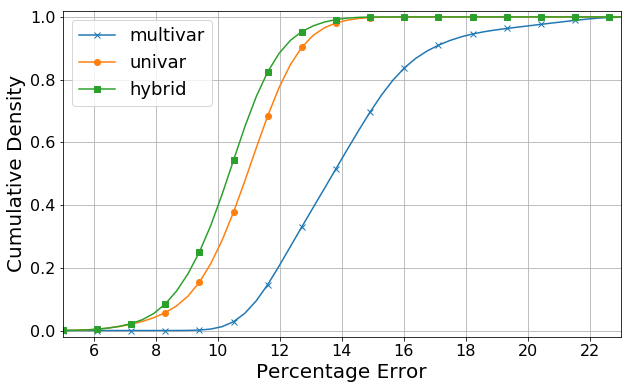

In [569]:
plt.figure(figsize=(10,6))
cdf_plot(multivar_errors, range_=(5,23), label_ = 'multivar', marker='x')
cdf_plot(univar_errors, range_=(5,23), label_ = 'univar', marker='o')
cdf_plot(hybrid_errors, range_=(5,23), label_ = 'hybrid', marker='s')
plt.legend(fontsize=18)
plt.grid()
plt.xlim(5,23)
plt.ylim(-0.02,1.02)
plt.xlabel("Percentage Error", fontsize=20)
plt.ylabel("Cumulative Density", fontsize=20)
plt.xticks(size=16)
plt.yticks(size=16)

In [546]:
def coeff_of_determination(y, pred):
    m = np.mean(y)
    SS_tot = np.sum((y - m)**2)
    SS_res = np.sum((y - pred)**2)
    return 1 - SS_res/SS_tot

In [550]:
multivar_R2s = [coeff_of_determination(Y_all[:,i], pred_multivar[:,i]) for i in range(58)]
univar_R2s = [coeff_of_determination(Y_all[:,i], pred_no_nbr_all[:,i]) for i in range(58)]
hybrid_R2s = [coeff_of_determination(Y_all[:,i], pred_5_nbr_all[:,i]) for i in range(58)]

In [549]:
multivar_R2s[:2]

[0.5909422043296744, 0.02951493146789408]

In [79]:
np.mean(multivar_R2s)

0.4432233599285729

In [80]:
np.std(multivar_R2s)

0.2494454027324607

In [75]:
coeff_of_determination(Y_all[:,0], pred_no_nbr[:,0])

0.6472748478000658

In [76]:
coeff_of_determination(Y_all[:,0], pred_5_nbr[:,0])

0.7208181628927277

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

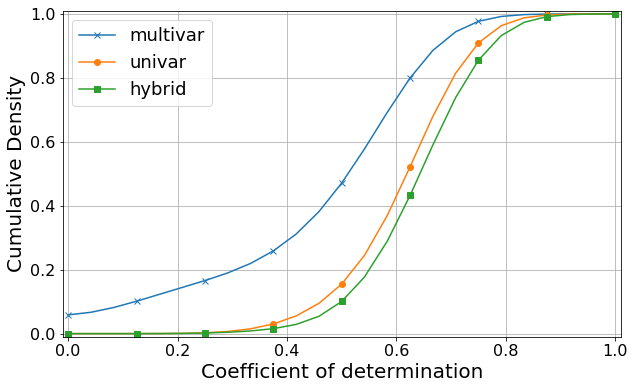

In [568]:
plt.figure(figsize=(10,6))
cdf_plot(multivar_R2s, bins=25, range_=(0,1), label_ = 'multivar', marker='x')
cdf_plot(univar_R2s, bins=25, range_=(0,1), label_ = 'univar', marker='o')
cdf_plot(hybrid_R2s, bins=25, range_=(0,1), label_ = 'hybrid', marker='s')
plt.legend(fontsize=18)
plt.grid()
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.xlabel("Coefficient of determination", fontsize=20)
plt.ylabel("Cumulative Density", fontsize=20)
plt.xticks(size=16)
plt.yticks(size=16)